<a href="https://colab.research.google.com/github/vlknkrkmz/DBE24_Artificial-Intelligence/blob/main/employee_attrition_predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- START: Daten laden ---
Alte Version von 'DBE24_Artificial-Intelligence' gelöscht.
Cloning into 'DBE24_Artificial-Intelligence'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 22.11 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Repository erfolgreich geklont.
✅ Erfolg! Datensatz geladen: 200 Zeilen, 26 Spalten.

--- START: Datenanalyse (EDA) ---


,employee_id,first_name,last_name,gender,date_of_birth,marital_status,education_level,job_role,department,manager_id,...,num_promotions,average_monthly_hours,salary,salary_grade,work_location_city,work_location_state,work_location_country,has_training_completed,num_projects,attrition
0,E0001,Riya,Patel,Female,1987-03-11,Married,Master,Finance Manager,Finance,NaN,...,3,168.0,97000,6,Mumbai,MH,India,True,18,False
1,E0002,Carlos,Dominguez,Male,1992-07-25,Single,Bachelor,Data Analyst,Data Science,E0030,...,1,146.0,50000,3,Madrid,MD,Spain,True,6,False
2,E0003,Aisha,Okafor,Female,1970-09-02,Widowed,Master,Director of Engineering,Engineering,NaN,...,7,192.0,205000,8,Lagos,LA,Nigeria,True,29,False
3,E0004,Sung-ho,Kim,Male,1980-05-16,Married,Doctorate,Lead Data Scientist,Data Science,E0003,...,4,178.0,123000,7,Seoul,11,South Korea,True,21,False
4,E0005,Olga,Ivanova,Female,1977-01-29,Divorced,Bachelor,QA Specialist,Quality,E0028,...,2,155.0,69000,4,Moscow,MOW,Russia,True,13,False



Datentypen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             200 non-null    object 
 1   first_name              200 non-null    object 
 2   last_name               200 non-null    object 
 3   gender                  200 non-null    object 
 4   date_of_birth           200 non-null    object 
 5   marital_status          200 non-null    object 
 6   education_level         198 non-null    object 
 7   job_role                200 non-null    object 
 8   department              200 non-null    object 
 9   manager_id              149 non-null    object 
 10  hire_date               200 non-null    object 
 11  termination_date        27 non-null     object 
 12  tenure_years            200 non-null    float64
 13  employment_status       200 non-null    object 
 14  satisfaction_level      200 n

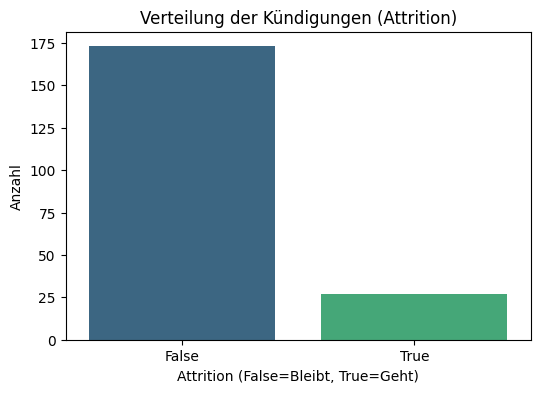

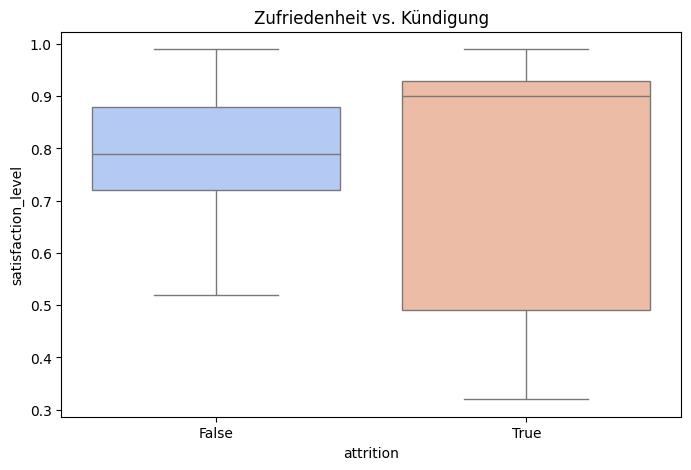


--- START: Preprocessing ---
Folgende Spalten werden kodiert: ['gender', 'marital_status', 'education_level', 'job_role', 'department', 'employment_status', 'work_location_country']
Datenaufbereitung abgeschlossen.

--- START: Modellierung ---

>>> Ergebnisse für: Logistische Regression <<<
Accuracy: 100.00%
Recall:   100.00% (Wichtig: Wie viele Kündiger wurden erkannt?)
F1-Score: 100.00%


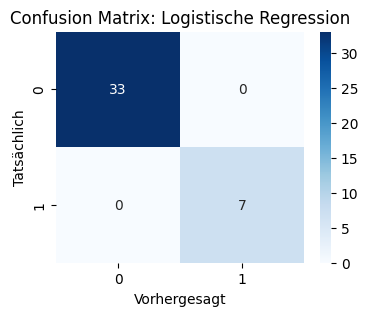


>>> Ergebnisse für: Decision Tree <<<
Accuracy: 100.00%
Recall:   100.00% (Wichtig: Wie viele Kündiger wurden erkannt?)
F1-Score: 100.00%


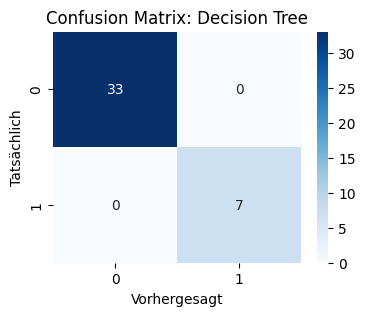


--- Analyse der wichtigsten Faktoren (Decision Tree) ---


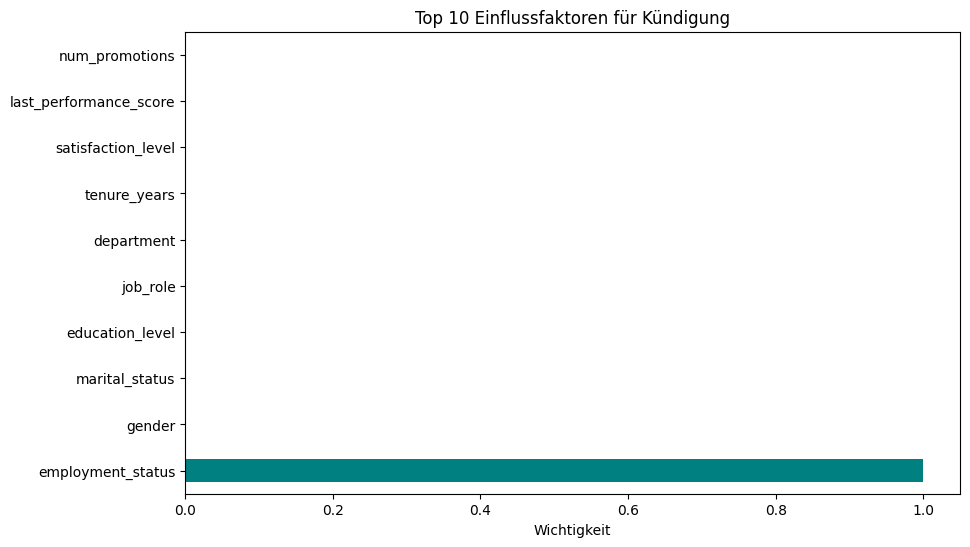


✅ Analyse vollständig abgeschlossen.


In [ ]:
# ==========================================
# PROJEKT: DBE24 - Artificial Intelligence
# AUFGABE: Fallstudie
# STUDENT: Volkan Korkmaz
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine Learning Bibliotheken (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------------
# TEIL 1: DATEN LADEN (Dein Code)
# ---------------------------------------------------------
print("--- START: Daten laden ---")

# 1. Definitionen
REPO_NAME = "DBE24_Artificial-Intelligence"
REPO_URL = f"https://github.com/vlknkrkmz/{REPO_NAME}.git"
CSV_NAME = "employee-attrition-prediction-dataset.csv"

# 2. Umgebung bereinigen
os.chdir('/content')
if os.path.exists(REPO_NAME):
    !rm -rf {REPO_NAME}
    print(f"Alte Version von '{REPO_NAME}' gelöscht.")

# 3. Klonen
!git clone {REPO_URL}
print("Repository erfolgreich geklont.")

# 4. Pfad zusammensetzen
file_path = os.path.join(REPO_NAME, CSV_NAME)

# 5. Daten laden
try:
    df = pd.read_csv(file_path)
    print(f"✅ Erfolg! Datensatz geladen: {df.shape[0]} Zeilen, {df.shape[1]} Spalten.")
except FileNotFoundError:
    print(f"❌ Fehler: Datei nicht gefunden unter: {file_path}")
    print("Inhalt des Ordners:", os.listdir(REPO_NAME))
    # Abbruch, falls keine Daten da sind
    raise

# ---------------------------------------------------------
# TEIL 2: EXPLORATIVE DATENANALYSE (EDA)
# ---------------------------------------------------------
print("\n--- START: Datenanalyse (EDA) ---")

# Erster Blick auf die Daten
display(df.head())
print("\nDatentypen:")
print(df.info())

# Visualisierung der Zielvariable (Attrition)
plt.figure(figsize=(6, 4))
sns.countplot(x='attrition', data=df, palette='viridis')
plt.title('Verteilung der Kündigungen (Attrition)')
plt.xlabel('Attrition (False=Bleibt, True=Geht)')
plt.ylabel('Anzahl')
plt.show()

# Einfluss der Zufriedenheit auf Kündigung
plt.figure(figsize=(8, 5))
sns.boxplot(x='attrition', y='satisfaction_level', data=df, palette='coolwarm')
plt.title('Zufriedenheit vs. Kündigung')
plt.show()

# ---------------------------------------------------------
# TEIL 3: DATENAUFBEREITUNG (PREPROCESSING)
# ---------------------------------------------------------
print("\n--- START: Preprocessing ---")

# 1. Unnötige Spalten entfernen (IDs, Namen etc.)
cols_to_drop = ['employee_id', 'first_name', 'last_name', 'manager_id', 'hire_date',
                'termination_date', 'date_of_birth', 'work_location_city', 'work_location_state']
df_clean = df.drop(cols_to_drop, axis=1, errors='ignore')

# 2. Kategorische Daten umwandeln (Encoding)
le = LabelEncoder()
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print(f"Folgende Spalten werden kodiert: {list(categorical_cols)}")

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# 3. X (Features) und y (Target) trennen
X = df_clean.drop('attrition', axis=1)
y = df_clean['attrition']

# 4. Train-Test-Split (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Skalierung (Wichtig für Logistische Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datenaufbereitung abgeschlossen.")

# ---------------------------------------------------------
# TEIL 4: MODELLIERUNG & EVALUATION
# ---------------------------------------------------------
print("\n--- START: Modellierung ---")

# Funktion zum Auswerten der Modelle
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n>>> Ergebnisse für: {model_name} <<<")
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {acc:.2%}")
    print(f"Recall:   {rec:.2%} (Wichtig: Wie viele Kündiger wurden erkannt?)")
    print(f"F1-Score: {f1:.2%}")

    # Confusion Matrix Plot
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Tatsächlich')
    plt.xlabel('Vorhergesagt')
    plt.show()

# --- MODELL 1: LOGISTISCHE REGRESSION ---
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_log, "Logistische Regression")

# --- MODELL 2: DECISION TREE (ENTSCHEIDUNGSBAUM) ---
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# --- FEATURE IMPORTANCE (Welche Faktoren sind wichtig?) ---
print("\n--- Analyse der wichtigsten Faktoren (Decision Tree) ---")
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Einflussfaktoren für Kündigung')
plt.xlabel('Wichtigkeit')
plt.show()

print("\n✅ Analyse vollständig abgeschlossen.")